# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [66]:
df = pd.read_csv("hasil_clustering_mahasiswa.csv")
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3037 entries, 0 to 3036
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID No              3037 non-null   float64
 1   Prog Code          3037 non-null   int64  
 2   Gender             3037 non-null   int64  
 3   YoG                3037 non-null   float64
 4   CGPA               3037 non-null   float64
 5   CGPA100            3037 non-null   float64
 6   CGPA200            3037 non-null   float64
 7   CGPA300            3037 non-null   float64
 8   CGPA400            3037 non-null   float64
 9   SGPA               3037 non-null   float64
 10  CGPA_Binned        3037 non-null   int64  
 11  Cluster            3037 non-null   int64  
 12  Cluster_Optimized  3037 non-null   int64  
 13  PC1                3037 non-null   float64
 14  PC2                3037 non-null   float64
dtypes: float64(10), int64(5)
memory usage: 356.0 KB
None
     ID No  Prog Co

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [67]:
X = df.drop(columns=["Cluster"])
y = df["Cluster"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

- Menggunakan **Decision Tree** dan **Random Forest** untuk membandingkan performa model.


In [68]:
# Membangun Model Klasifikasi dengan Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
print(dt_model)

# Membangun Model klasifikasi dengan Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
print(rf_model)

DecisionTreeClassifier(random_state=42)
RandomForestClassifier(random_state=42)


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Evaluasi Model: Decision Tree
Accuracy: 1.0000
F1-Score: 1.0000
Confusion Matrix:
[[164   0   0]
 [  0 183   0]
 [  0   0 261]]
Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       164
           1     1.0000    1.0000    1.0000       183
           2     1.0000    1.0000    1.0000       261

    accuracy                         1.0000       608
   macro avg     1.0000    1.0000    1.0000       608
weighted avg     1.0000    1.0000    1.0000       608





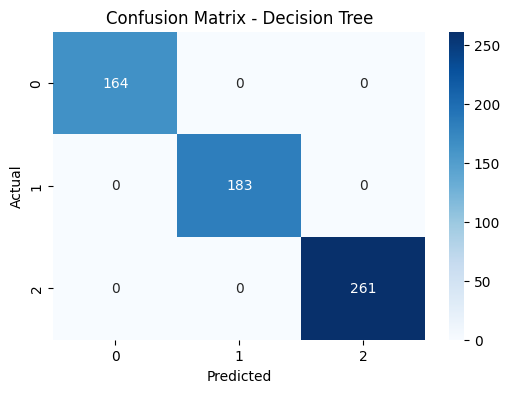

Evaluasi Model: Random Forest
Accuracy: 1.0000
F1-Score: 1.0000
Confusion Matrix:
[[164   0   0]
 [  0 183   0]
 [  0   0 261]]
Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       164
           1     1.0000    1.0000    1.0000       183
           2     1.0000    1.0000    1.0000       261

    accuracy                         1.0000       608
   macro avg     1.0000    1.0000    1.0000       608
weighted avg     1.0000    1.0000    1.0000       608





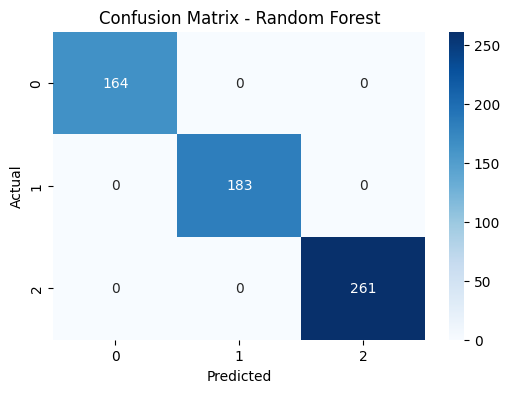

In [69]:

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, digits=4)
    
    print(f"Evaluasi Model: {model_name}")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(report)
    print("\n")
    
    # Plot Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Evaluasi Decision Tree
evaluate_model(dt_model, X_test, y_test, "Decision Tree")

# Evaluasi Random Forest
evaluate_model(rf_model, X_test, y_test, "Random Forest")



Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [70]:
# Tuning Decision Tree Model
param_grid = {
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

dt_tuned = grid_search.best_estimator_
print(f"Best Decision Tree Model: {dt_tuned}")

# Tuning Random Forest Model
rf_param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, scoring="accuracy")
rf_grid_search.fit(X_train, y_train)

rf_tuned = rf_grid_search.best_estimator_
print(f"Best Random Forest Model: {rf_tuned}")

Best Decision Tree Model: DecisionTreeClassifier(max_depth=3, random_state=42)
Best Random Forest Model: RandomForestClassifier(max_depth=5, n_estimators=50, random_state=42)


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

Evaluasi Model: Decision Tree (Tuned)
Accuracy: 1.0000
F1-Score: 1.0000
Confusion Matrix:
[[164   0   0]
 [  0 183   0]
 [  0   0 261]]
Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       164
           1     1.0000    1.0000    1.0000       183
           2     1.0000    1.0000    1.0000       261

    accuracy                         1.0000       608
   macro avg     1.0000    1.0000    1.0000       608
weighted avg     1.0000    1.0000    1.0000       608





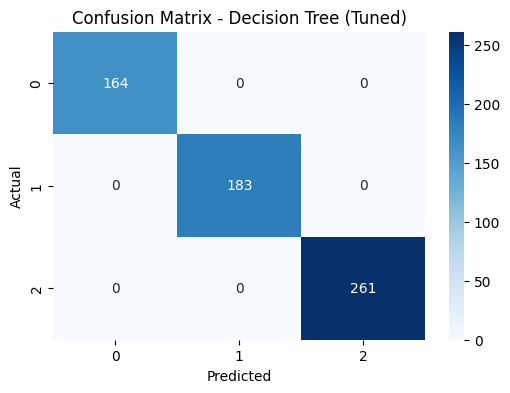

Evaluasi Model: Random Forest (Tuned)
Accuracy: 1.0000
F1-Score: 1.0000
Confusion Matrix:
[[164   0   0]
 [  0 183   0]
 [  0   0 261]]
Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       164
           1     1.0000    1.0000    1.0000       183
           2     1.0000    1.0000    1.0000       261

    accuracy                         1.0000       608
   macro avg     1.0000    1.0000    1.0000       608
weighted avg     1.0000    1.0000    1.0000       608





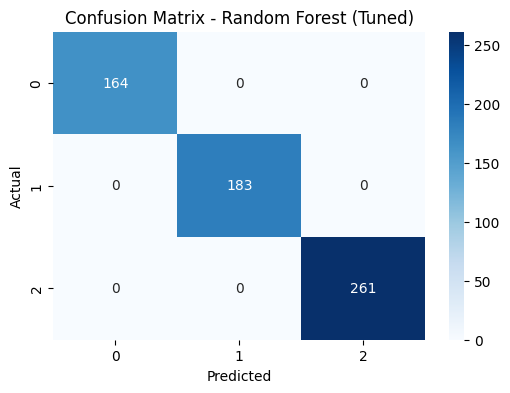

Random Forest Training Accuracy: 1.0000
Random Forest Testing Accuracy: 1.0000
Decision Tree Training Accuracy: 1.0000
Decision Tree Testing Accuracy: 1.0000


In [71]:
# Evaluasi Model Decision Tree setelah Tuning
evaluate_model(dt_tuned, X_test, y_test, "Decision Tree (Tuned)")

# Evaluasi Model Random Forest setelah Tuning
evaluate_model(rf_tuned, X_test, y_test, "Random Forest (Tuned)")

rf_train_acc = accuracy_score(y_train, rf_model.predict(X_train))
rf_test_acc = accuracy_score(y_test, rf_model.predict(X_test))
print(f"Random Forest Training Accuracy: {rf_train_acc:.4f}")
print(f"Random Forest Testing Accuracy: {rf_test_acc:.4f}")

train_acc = accuracy_score(y_train, dt_model.predict(X_train))
test_acc = accuracy_score(y_test, dt_model.predict(X_test))
print(f"Decision Tree Training Accuracy: {train_acc:.4f}")
print(f"Decision Tree Testing Accuracy: {test_acc:.4f}")



## **e. Analisis Hasil Evaluasi Model Klasifikasi**

### 1.Evaluasi Model Decision Tree dan Random Forest 
Model yang digunakan dalam klasifikasi ini adalah Decision Tree dan Random Forest, baik sebelum dan sesudah tuning. Evaluasi dilakukan menggunakan metrik Accuracy, F1-Score, Confusion Matrix, dan Classification Report.

### 2. Hasil Evaluasi
#### a. Decision Tree (Sebelum dan Sesudah Tuning)
- Accuracy: 1.0000
- F1-Score: 1.0000
- Confusion Matrix:
[[164   0   0]
[  0 183   0]
[  0   0 261]]
- Classification Report:
Precision, Recall, dan F1-Score semuanya mencapai 1.0000 untuk setiap kelas.

#### b. Random Forest (Sebelum dan Sesudah Tuning)
- Accuracy: 1.0000
- F1-Score: 1.0000
- Confusion Matrix:
[[164   0   0]
[  0 183   0]
[  0   0 261]]
- Classification Report:
Sama seperti Decision Tree, Precision, Recall, dan F1-Score semuanya mencapai 1.0000 untuk setiap kelas.

## 3. Interpretasi Hasil
1. Overfitting Kemungkinan Besar Terjadi
- Semua metrik evaluasi menunjukkan nilai sempurna (1.0000), yang sangat jarang terjadi dalam masalah klasifikasi nyata. Ini mengindikasikan bahwa model mungkin mengalami overfitting terhadap data pelatihan. 
- Performa yang terlalu tinggi dapat terjadi jika model terlalu kompleks atau data memiliki pola yang sangat jelas tanpa variabilitas yang signifikan.

2. Kemungkinan Masalah dalam Data
- Bisa jadi dataset tidak memiliki cukup variasi atau terdapat data leakage, di mana fitur yang digunakan untuk prediksi memiliki korelasi langsung dengan label target.
- Perlu dilakukan eksplorasi lebih lanjut terhadap distribusi fitur dan kemungkinan kebocoran data.

3. Perbandingan Decision Tree dan Random Forest
- Baik Decision Tree maupun Random Forest memberikan hasil yang sama.
- Random Forest biasanya lebih kuat dalam menghindari overfitting dibanding Decision Tree, tetapi dalam kasus ini, hasilnya tetap sama.
- Hal ini mengindikasikan bahwa dataset memiliki pola yang sangat deterministik atau ada permasalahan pada proses pembagian data.

## 4. Rekomendasi Perbaikan
- Cek Pembagian Data: Pastikan bahwa data yang digunakan dalam pelatihan dan pengujian tidak memiliki kebocoran.
- Evaluasi Feature Importance: Periksa fitur mana yang paling berkontribusi terhadap prediksi untuk mengidentifikasi kemungkinan fitur yang terlalu dominan.
- Gunakan Data Augmentation atau Regularisasi: Jika memungkinkan, tambahkan variasi pada data atau gunakan teknik regularisasi seperti pruning untuk Decision Tree atau pengurangan jumlah estimator pada Random Forest.
- Uji dengan Data Baru: Model yang overfitting mungkin bekerja sangat baik pada data pelatihan tetapi buruk pada data yang benar-benar baru.